# Multicanonical simulation of liquid Na

### The goal of this example is to reproduce the results of simulations of liquid Na in the canonical ensemble in the temperature interval 400-600 K using only one simulation in the multicanonical ensemble. We would like to obtain the average potential energy $\langle U \rangle$ from the multicanonical simulation and also study the convergence of the algorithm that we employ.

#### Simulation reported in *Multithermal-multibaric molecular simulations from a variational principle*, PM Piaggi, M Parrinello, Physical Review Letters **122** (5), 050601

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
###################################################################
# Plot options
###################################################################

font = {'family' : 'serif',
        'serif'   : 'palatino',
        #'sans-serif'    : 'Computer Modern Sans serif', 
        'style'   : 'normal',
        'variant'   : 'normal',
        'stretch'   : 'normal',
        'weight'   : 'normal',
        'size'   : 20}
plt.rc('font', **font)
plt.rc('text', usetex=True)
plt.rcParams['figure.figsize'] = (15,7)

###################################################################
# Colors
###################################################################
# Palette 1
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
MarkerSize=20
palette=tableau20

import matplotlib
matplotlib.colors.ColorConverter.colors['palette1'] = palette[0]
matplotlib.colors.ColorConverter.colors['palette2'] = palette[2]
matplotlib.colors.ColorConverter.colors['palette3'] = palette[4]
matplotlib.colors.ColorConverter.colors['palette4'] = palette[6]
matplotlib.colors.ColorConverter.colors['palette5'] = palette[8]
matplotlib.colors.ColorConverter.colors['palette6'] = palette[10]
matplotlib.colors.ColorConverter.colors['palette7'] = palette[12]
matplotlib.colors.ColorConverter.colors['palette8'] = palette[14]
matplotlib.colors.ColorConverter.colors['palette9'] = palette[16]
matplotlib.colors.ColorConverter.colors['palette10'] = palette[18]

paletteNames=['palette1','palette2','palette3','palette4',
              'palette5','palette6','palette7','palette8',
              'palette9','palette10']

## Distributions in the canonical and multicanonical ensemble

In [4]:
target=np.genfromtxt("Multicanonical/Output/targetdistributions/targetdist.b1.iter-1000.data")
sampled=np.genfromtxt("Multicanonical/Analysis/SampledDistribution/histoEne")
histo400=np.genfromtxt("References/Temp400K/Distribution/histoEne")
histo450=np.genfromtxt("References/Temp450K/Distribution/histoEne")
histo500=np.genfromtxt("References/Temp500K/Distribution/histoEne")
histo550=np.genfromtxt("References/Temp550K/Distribution/histoEne")
histo600=np.genfromtxt("References/Temp600K/Distribution/histoEne")

Here we compared the sampled distributions in the canonical ensemble and in the multicanonical ensemble (temperature range 400-600 K). The dashed line is the target distribution and the blue line is the sampled distribution. There is good overlap between the multicanonical distribution and the canonical ones. Therefore the multicanonical simulation can be used to calculate static physical quantities in the targeted temperature range.

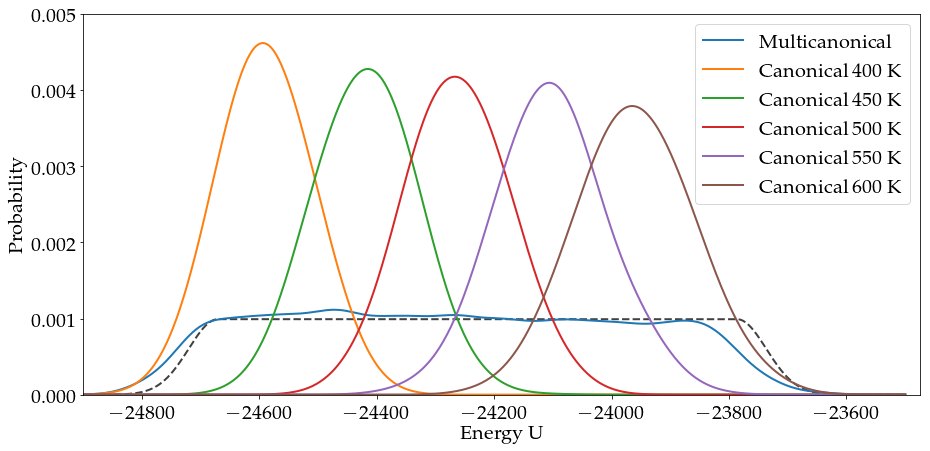

In [13]:
fig, ax1 = plt.subplots()

ax1.plot(target[:,0],target[:,1],'--',linewidth=2.,color='black',alpha=0.75)
ax1.plot(sampled[:,0],sampled[:,1],linewidth=2.,label="Multicanonical")
ax1.plot(histo400[:,0],histo400[:,1],linewidth=2.,label="Canonical 400 K")
ax1.plot(histo450[:,0],histo450[:,1],linewidth=2.,label="Canonical 450 K")
ax1.plot(histo500[:,0],histo500[:,1],linewidth=2.,label="Canonical 500 K")
ax1.plot(histo550[:,0],histo550[:,1],linewidth=2.,label="Canonical 550 K")
ax1.plot(histo600[:,0],histo600[:,1],linewidth=2.,label="Canonical 600 K")
ax1.set_ylim([0,0.005])
ax1.set_xlim([-24900,-23475])
plt.xlabel("Energy U")
plt.ylabel("Probability")
plt.legend()
plt.show()

In [6]:
fes400=np.genfromtxt("References/Temp400K/Distribution/fesEne")
fes450=np.genfromtxt("References/Temp450K/Distribution/fesEne")
fes500=np.genfromtxt("References/Temp500K/Distribution/fesEne")
fes550=np.genfromtxt("References/Temp550K/Distribution/fesEne")
fes600=np.genfromtxt("References/Temp600K/Distribution/fesEne")

## Figure 1 in the paper

This figure illustrates how the algorithm finds the limits of the energy interval.

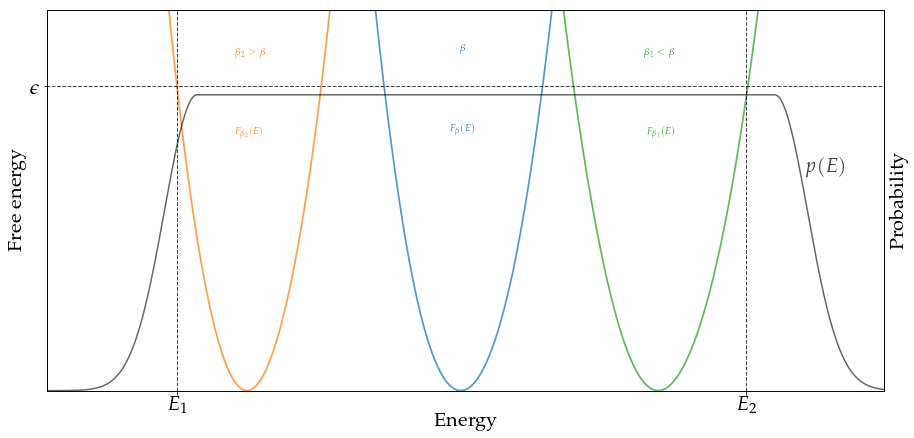

In [14]:
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

def beta(temp):
    boltzmann=0.0083144621
    return 1./(temp*boltzmann)

ax2.plot(target[:,0],target[:,1],alpha=0.6,linewidth=1.5,color="black")
ax1.plot(fes500[:,0],beta(500)*fes500[:,1]-np.amin(beta(500)*fes500[:,1]),linewidth=1.75,alpha=0.75)
ax1.plot(fes400[:,0],beta(400)*fes400[:,1]-np.amin(beta(400)*fes400[:,1]),linewidth=1.75,alpha=0.75)
ax1.plot(fes600[:,0],beta(600)*fes600[:,1]-np.amin(beta(600)*fes600[:,1]),linewidth=1.75,alpha=0.75)
ax1.plot(fes600[:,0],0.8*fes600[:,0]/fes600[:,0],'--',color='black',alpha=0.75,linewidth=1.)
ax1.plot([-24700,-24700],[0,1.0],'--',color='black',alpha=0.75,linewidth=1.)
ax1.plot([-23830,-23830],[0,1.0],'--',color='black',alpha=0.75,linewidth=1.)
ax1.set_ylim([0,1.0])
ax2.set_ylim([0,0.001275])
ax1.set_xlim([-24900,-23620])
ax1.set_xticks([-24700,-23830])
ax1.set_xticklabels([r'$E_1$',r'$E_2$'])
ax1.set_yticks([0.8])
ax1.set_yticklabels([r'$\epsilon$'])
ax2.set_yticks([])
ax1.set_xlabel("Energy",labelpad=-5.)
ax1.set_ylabel("Free energy")
ax2.set_ylabel("Probability")

ax1.text(-24265,0.685,r'$F_{\beta}(E)$'  ,color=palette[0],va='center',ha='center',fontsize=10,alpha=0.9)
ax1.text(-24591,0.675,r'$F_{\beta_2}(E)$',color=palette[2],va='center',ha='center',fontsize=10,alpha=0.9)
ax1.text(-23960,0.675,r'$F_{\beta_1}(E)$',color=palette[4],va='center',ha='center',fontsize=10,alpha=0.9)

ax1.text(-24265,0.90,r'$\beta$'    ,color=palette[0],va='center',ha='center',fontsize=10,alpha=0.9)
ax1.text(-24591,0.885,r'$\beta_2>\beta$',color=palette[2],va='center',ha='center',fontsize=10,alpha=0.9)
ax1.text(-23965,0.885,r'$\beta_1<\beta$',color=palette[4],va='center',ha='center',fontsize=10,alpha=0.9)

ax2.text(-23710,0.00075,r'$p(E)$',color='black',va='center',ha='center',alpha=0.75)


plt.show()

In [8]:
energy400=np.genfromtxt("References/Temp400K/COLVAR")
energy450=np.genfromtxt("References/Temp450K/COLVAR")
energy500=np.genfromtxt("References/Temp500K/COLVAR")
energy550=np.genfromtxt("References/Temp550K/COLVAR")
energy600=np.genfromtxt("References/Temp600K/COLVAR")
energyMean=np.genfromtxt("Multicanonical/Analysis/Reweight/resultsEnergy.txt")

## Comparison between energies calculated from the multicanonical simulation and the references

Average potential energy calculated in the canonical and multicanonical ensembles. The agreement is excellent. The errorbars are the error of the population and not of the mean and therefore the errors are overestimated

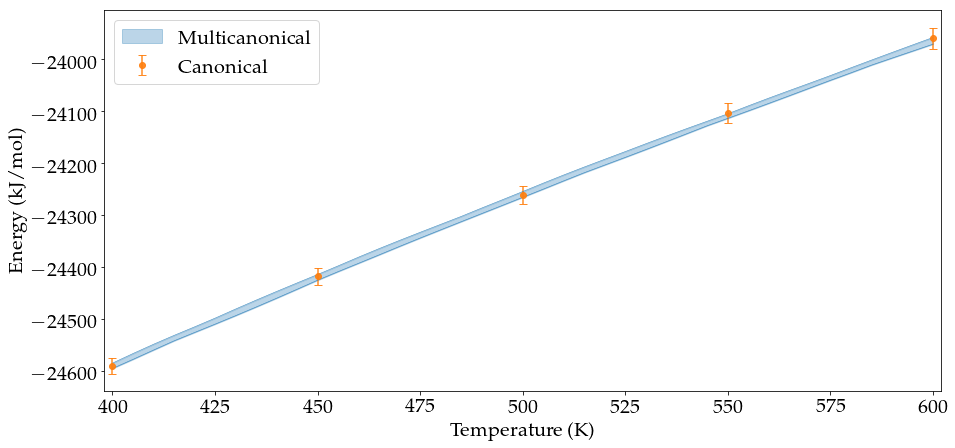

In [9]:
fig, ax1 = plt.subplots()

ax1.plot(energyMean[:,0],energyMean[:,4],color=palette[0],alpha=0.9,linewidth=0.5)
ax1.plot(energyMean[:,0],energyMean[:,5],color=palette[0],alpha=0.9,linewidth=0.5)
ax1.fill_between(energyMean[:,0],energyMean[:,4],energyMean[:,5],color=palette[0],alpha=0.3,label="Multicanonical")

temps=np.array([400,450,500,550,600])
energyMeanRef=np.array([np.mean(energy400[:,1]),
               np.mean(energy450[:,1]),
               np.mean(energy500[:,1]),
               np.mean(energy550[:,1]),
               np.mean(energy600[:,1]) ])
energyDevRef=np.array([np.std(energy400[:,1]),
               np.std(energy450[:,1]),
               np.std(energy500[:,1]),
               np.std(energy550[:,1]),
               np.std(energy600[:,1]) ])
ax1.errorbar(temps,energyMeanRef,yerr=energyDevRef/np.sqrt(20),alpha=0.9,color=palette[2], fmt='o', capsize=4.,label="Canonical")

ax1.set_xlabel("Temperature (K)")
ax1.set_ylabel("Energy (kJ/mol)")
ax1.set_xlim([398,602])
ax1.legend()

plt.show()

## Figure 1 of the Supplemental Material

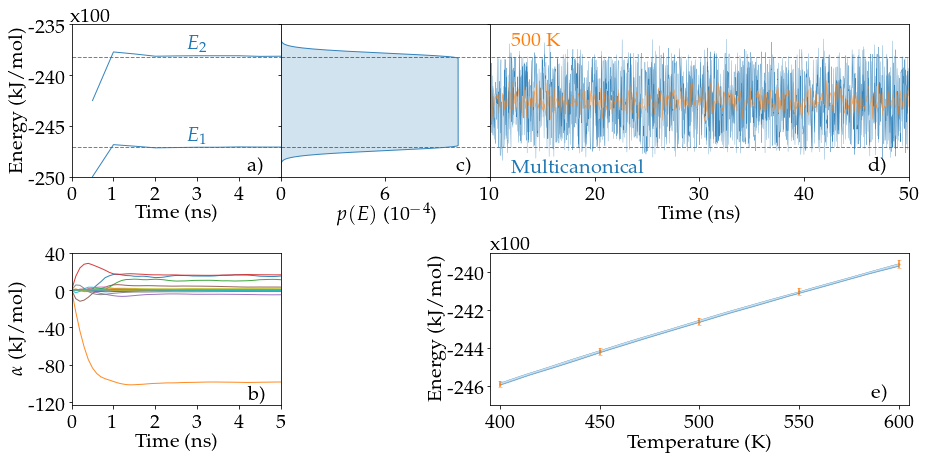

In [12]:
fig = plt.figure()
fig.subplots_adjust(wspace=0.0,hspace=0.5)
numSubplotsY=2
numSubplotsX=4

ax1    = plt.subplot2grid((numSubplotsY,numSubplotsX), (0, 0), rowspan=1, colspan=1)
ax2    = plt.subplot2grid((numSubplotsY,numSubplotsX), (0, 1), rowspan=1, colspan=1)
ax3    = plt.subplot2grid((numSubplotsY,numSubplotsX), (0, 2), rowspan=1, colspan=2)
ax5    = plt.subplot2grid((numSubplotsY,numSubplotsX), (1, 0), rowspan=1, colspan=1)
ax6    = plt.subplot2grid((numSubplotsY,numSubplotsX), (1, 2), rowspan=1, colspan=2)


E1=np.zeros(100)
E2=np.zeros(100)
counter=0
for i in range(500,10500,500):
    name = "Multicanonical/Output/targetdistributions/targetdist.b1.iter-" + str(i) + ".data"
    data=np.genfromtxt(name)
    E1[counter]=data[np.argmin(np.abs(data[:500,1]-0.00095)),0]
    E2[counter]=data[np.argmin(np.abs(data[500:,1]-0.00095))+500,0]
    counter += 1
  

E2=E2[:counter]
E1=E1[:counter]

x=np.arange(0,counter+1)/2.
ax1.plot(x,E1[counter-1]*np.ones(counter+1),'--',color='black',alpha=0.5,linewidth=1.0)
ax1.plot(x,E2[counter-1]*np.ones(counter+1),'--',color='black',alpha=0.5,linewidth=1.0)
x=np.arange(1,counter+1)/2.
ax1.plot(x,E1,alpha=0.9,linewidth=1.,color=palette[0])
ax1.plot(x,E2,alpha=0.9,linewidth=1.,color=palette[0])
ax1.set_ylim([-25000,-23500])
ax1.set_xlim([0,5])
ax1.set_yticks(np.arange(-25000,-23000,500))
ax1.set_yticklabels(np.arange(-250,-230,5))
ax1.set_xlabel("Time (ns)",labelpad=1)
ax1.set_ylabel("Energy (kJ/mol)",labelpad=1)
ax1.set_xticks(np.arange(0,5,1))
ax1.text(3,-24716.5+100,"$E_1$",color=palette[0],va='center',ha='center')
ax1.text(3,-23810.5+100,"$E_2$",color=palette[0],va='center',ha='center')
ax1.text(-0.05,-23470,"x100")
ax1.text(4.4,-24890,"a)",va='center',ha='center')

x=np.arange(0,counter+1)/1000
ax2.plot(x,E1[counter-1]*np.ones(counter+1),'--',color='black',alpha=0.5,linewidth=1.)
ax2.plot(x,E2[counter-1]*np.ones(counter+1),'--',color='black',alpha=0.5,linewidth=1.)
data=np.genfromtxt("Multicanonical/Output/targetdistributions/targetdist.b1.iter-10000.data")
ax2.plot(data[:,1],data[:,0],alpha=0.9,linewidth=1.)
ax2.fill_between(data[:,1],0,data[:,0],alpha=0.2,linewidth=0.0)
ax2.set_ylim([-25000,-23500])
ax2.set_yticks(np.arange(-25000,-23000,500))
ax2.set_yticklabels([])
ax2.set_xlim([0,0.0012])
ax2.set_xticks(np.arange(0,0.0012,0.0006))
ax2.set_xticklabels([r'0',r'6'])
ax2.set_xlabel(r'$p(E)$ ($10^{-4}$)',labelpad=0)
ax2.text(0.00105,-24890,"c)",va='center',ha='center')

x=np.arange(0,counter+1)*3
ax3.plot(x,E1[counter-1]*np.ones(counter+1),'--',color='black',alpha=0.5,linewidth=1.)
ax3.plot(x,E2[counter-1]*np.ones(counter+1),'--',color='black',alpha=0.5,linewidth=1.)
data=np.genfromtxt("Multicanonical/Output/COLVAR")
ax3.plot(data[::20,0]/1000,data[::20,1],linewidth=0.3,alpha=0.9)
ax3.set_xlim([10,50])
ax3.set_ylim([-25000,-23500])
ax3.set_yticks(np.arange(-25000,-23000,500))
ax3.set_yticklabels([])
ax3.set_xticks(np.arange(10,60,10))
ax3.set_xlabel("Time (ns)",labelpad=2)
ax3.text(12,-24716.5-180,"Multicanonical",color=palette[0],va='center',ha='left')
ax3.text(12,-23810.5+160,"500 K",color=palette[2],va='center',ha='left')
ax3.text(47,-24890,"d)",va='center',ha='center')


data=np.genfromtxt("References/Temp500K/COLVAR")
ax3.plot(data[:,0]*50/1000,data[:,1],linewidth=0.3,color=palette[2])


data=np.genfromtxt("Multicanonical/Output/coeffs.data")
x=np.linspace(0,10,101)
ax5.plot(x,data[:,1].reshape(101,21)[:,1:],linewidth=1.,alpha=0.9)
ax5.set_ylim([-123,40])
ax5.set_yticks(np.arange(-120,80,40))
ax5.set_yticklabels(np.arange(-120,80,40))
ax5.set_xlim([0,5])
ax5.set_xticks(np.arange(0,6,1))
ax5.set_xlabel("Time (ns)",labelpad=1)
ax5.set_ylabel(r'$\alpha$ (kJ/mol)',labelpad=1)
ax5.text(4.4,-112,"b)",va='center',ha='center')


energy400=np.genfromtxt("References/Temp400K/COLVAR")
energy450=np.genfromtxt("References/Temp450K/COLVAR")
energy500=np.genfromtxt("References/Temp500K/COLVAR")
energy550=np.genfromtxt("References/Temp550K/COLVAR")
energy600=np.genfromtxt("References/Temp600K/COLVAR")
energyMean=np.genfromtxt("Multicanonical/Analysis/Reweight/resultsEnergy.txt")

ax6.plot(energyMean[:,0],energyMean[:,4],color=palette[0],alpha=0.9,linewidth=0.4)
ax6.plot(energyMean[:,0],energyMean[:,5],color=palette[0],alpha=0.9,linewidth=0.4)
ax6.fill_between(energyMean[:,0],energyMean[:,4],energyMean[:,5],color=palette[0],alpha=0.3,linewidth=0.0)

temps=np.array([400,450,500,550,600])
energyMeanRef=np.array([np.mean(energy400[:,1]),
               np.mean(energy450[:,1]),
               np.mean(energy500[:,1]),
               np.mean(energy550[:,1]),
               np.mean(energy600[:,1]) ])
energyDevRef=np.array([np.std(energy400[:,1]),
               np.std(energy450[:,1]),
               np.std(energy500[:,1]),
               np.std(energy550[:,1]),
               np.std(energy600[:,1]) ])
ax6.errorbar(temps,energyMeanRef,yerr=energyDevRef/np.sqrt(20),alpha=0.9,color=palette[2], fmt='o', markersize=1, capsize=2.,capthick=0.5)

ax6.set_xlabel("Temperature (K)",labelpad=1)
ax6.set_ylabel("Energy (kJ/mol)",labelpad=1)
ax6.set_xlim([395,605])
ax6.set_ylim([-24700,-23900])
ax6.set_yticks(np.arange(-24600,-23800,200))
ax6.set_yticklabels(np.arange(-246,-238,2))
ax6.text(395,-23880,"x100")
ax6.text(590,-24635,"e)",va='center',ha='center')

plt.show()